<a href="https://colab.research.google.com/github/SichenPa221/ATSI/blob/main/Robot_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


### Drone Dynamic

In [164]:
def quadrotor_dynamics(state, t, u):


    # Unpack the state vector
    x, y, z, x_dot, y_dot, z_dot, phi, theta, psi, phi_dot, theta_dot, psi_dot = state

    # Unpack the control inputs
    u1, u2, u3, u4 = u

    # Constants
    g = 9.81  # Acceleration due to gravity (m/s^2)

    # Compute the derivatives of the state vector
    x_ddot = -u1 * np.cos(phi) * np.sin(theta)
    y_ddot = u1 * np.sin(phi)
    z_ddot = g - (u1 * np.cos(phi) * np.cos(theta))
    phi_ddot = u2
    theta_ddot = u3
    psi_ddot = u4

    # Return the derivatives in the same order as the state vector
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot, phi_dot, theta_dot, psi_dot, phi_ddot, theta_ddot, psi_ddot]

    return dstate_dt


In [165]:
def quadrotor_dynamics_flat(state, t, u):


    # Unpack the state vector
    x, y, z, x_dot, y_dot, z_dot, phi, theta, psi, phi_dot, theta_dot, psi_dot = state

    # Unpack the control inputs
    u1, u2, u3, u4 = u

    # Constants
    g = 9.81  # Acceleration due to gravity (m/s^2)

    # Compute the derivatives of the state vector
    x_ddot = -u1 * theta
    y_ddot = u1 * phi
    z_ddot = g - u1
    phi_ddot = u2
    theta_ddot = u3
    psi_ddot = u4

    # Return the derivatives in the same order as the state vector
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot, phi_dot, theta_dot, psi_dot, phi_ddot, theta_ddot, psi_ddot]

    return dstate_dt

### Reference static

(10000, 3)
2 2.5 1.0


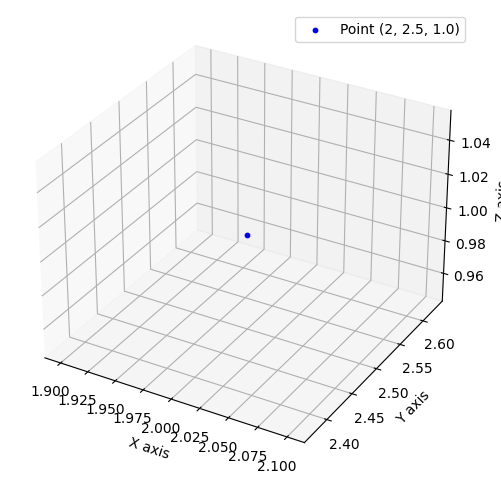

In [166]:
constante = lambda: None # Lazy way to define an empty class in python
constante.eps = 0.01
constante.g = 9.81
def reference_static(t, eps):
    # Constants for the trajectory
    z_height = 1.0  # Constant height
    a =2
    b = 2.5
    phi=0


    # Calculate positions and their derivatives
    x = a
    dotx = 0
    dot2x = 0
    dot3x = 0
    dot4x = 0

    x_1 = a
    dotx_1 = 0
    dot2x_1 = 0

    x_2 = a
    dotx_2 = 0
    dot2x_2 = 0

    x = [x,x_1, x_2]
    dotx = [dotx,dotx_1, dotx_2]
    dot2x = [dot2x, dot2x_1, dot2x_2]


    y = b
    doty =0
    dot2y = 0
    dot3y = 0
    dot4y = 0

    y_1 = b
    doty_1 =0
    dot2y_1 = 0

    y_2 = b
    doty_2 = 0
    dot2y_2 = 0

    y = [y, y_1, y_2]
    doty = [doty, doty_1, doty_2]
    dot2y = [dot2y, dot2y_1, dot2y_2]

    z = z_height
    dotz = 0.0
    dot2z = 0.0  # Constant altitude change rate implies zero acceleration

    return [x, y, z, dotx, dot2x, dot3x, dot4x, doty, dot2y, dot3y, dot4y, dotz, dot2z, phi]

time = np.arange(0,100, constante.eps)

state_stock_x = []
state_stock_y = []
state_stock_z = []


for i in time:
    x, y, z, dotx, dot2x, dot3x, dot4x, doty, dot2y, dot3y, dot4y, dotz, dot2z, phi = reference_static(i, eps = constante.eps)

    state_stock_x.append(x)
    state_stock_y.append(y)
    state_stock_z.append(z)
state_stock_x = np.array(state_stock_x)
state_stock_y = np.array(state_stock_y)
state_stock_z = np.array(state_stock_z)

print(state_stock_y.shape)

# Extracting x, y, and z coordinates
x, y, z = state_stock_x[0,0], state_stock_y[0, 0], state_stock_z[0]

print(x,y,z)
# Plotting the 3D trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue', s=10, label='Point (2, 2.5, 1.0)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()

### Reference Trajecotry

(10000, 3)


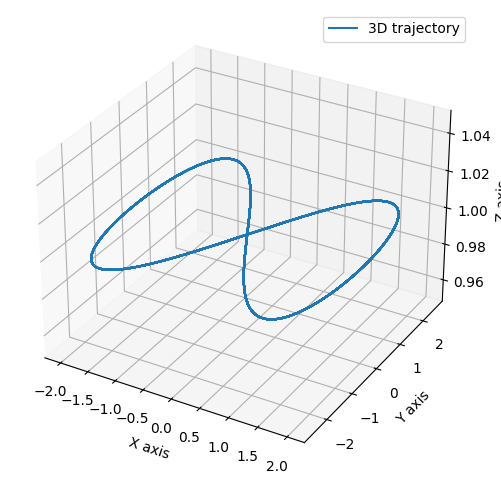

In [167]:

def reference(t, eps):
    # Constants for the trajectory
    # Constants for the trajectory
    a =2.0
    b = 2.5
    v = 2.0
    phi = 0.0  # Yaw angle is kept constant at 0
    z_height = 1.0  # Constant height
    z_velocity = 0.0  # Slight vertical velocity

    # Pre-calculate reused trigonometric terms
    # sin_t = np.sin(t)
    # cos_t = np.cos(t)
    # sin_vt_phi = np.sin(v * t + phi)
    # cos_vt_phi = np.cos(v * t + phi)

    # Calculate positions and their derivatives
    x = a * np.sin(t)
    dotx = a * np.cos(t)
    dot2x = -a * np.sin(t)
    dot3x = -a * np.cos(t)
    dot4x = a * np.sin(t)

    x_1 = a * np.sin(t+eps)
    dotx_1 = a * np.cos(t+eps)
    dot2x_1 = -a * np.sin(t+eps)

    x_2 = a * np.sin(t+2*eps)
    dotx_2 = a * np.cos(t+2*eps)
    dot2x_2 = -a * np.sin(t+2*eps)

    x = [x,x_1, x_2]
    dotx = [dotx,dotx_1, dotx_2]
    dot2x = [dot2x, dot2x_1, dot2x_2]


    y = b * np.sin(v * t + phi)
    doty = v * b * np.cos(v * t + phi)
    dot2y = -(v ** 2.0) * b * np.sin(v * t + phi)
    dot3y = -(v ** 3.0) * b * np.cos(v * t + phi)
    dot4y = (v ** 4.0) * b * np.sin(v * t + phi)

    y_1 = b * np.sin(v * (t+eps) + phi)
    doty_1 = v * b * np.cos(v * (t+eps) + phi)
    dot2y_1 = -(v ** 2.0) * b * np.sin(v * (t+eps) + phi)

    y_2 = b * np.sin(v * (t+eps) + phi)
    doty_2 = v * b * np.cos(v * (t+eps) + phi)
    dot2y_2 = -(v ** 2.0) * b * np.sin(v * (t+eps) + phi)

    y = [y, y_1, y_2]
    doty = [doty, doty_1, doty_2]
    dot2y = [dot2y, dot2y_1, dot2y_2]

    z = z_height
    dotz = z_velocity
    dot2z = 0.0  # Constant altitude change rate implies zero acceleration

    return [x, y, z, dotx, dot2x, dot3x, dot4x, doty, dot2y, dot3y, dot4y, dotz, dot2z, phi]

time = np.arange(0,100, constante.eps)

state_stock_x = []
state_stock_y = []
state_stock_z = []


for i in time:
    x, y, z, dotx, dot2x, dot3x, dot4x, doty, dot2y, dot3y, dot4y, dotz, dot2z, phi = reference(i, eps = constante.eps)

    state_stock_x.append(x)
    state_stock_y.append(y)
    state_stock_z.append(z)
state_stock_x = np.array(state_stock_x)
state_stock_y = np.array(state_stock_y)
state_stock_z = np.array(state_stock_z)

print(state_stock_y.shape)

# Extracting x, y, and z coordinates
x, y, z = state_stock_x[:,0], state_stock_y[:, 0], state_stock_z[0]
# Plotting the 3D trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='3D trajectory')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()



### Simulation step


In [239]:


# Assuming quadrotor_dynamics is defined elsewhere
# def quadrotor_dynamics(x, t, u):
#     # Dynamics equations here
#     return np.array([...])

def simulate_step(x0, u0, eps, simulate_time=10):
    """
    Simulate one time step of the quadrotor dynamics and calculate state derivatives.

    Parameters:
    - x0: Initial state vector.
    - u0: Control input vector.
    - eps: Time step for simulation.
    - simulate_time: Number of eps intervals to simulate forward.

    Returns:
    - next_state: State vector at the next time step.
    - derivatives: Dictionary of first, second, third, and fourth derivatives of the state.
    """
    # Define the time range for the current step plus the next simulate_time steps
    t_batch = np.arange(0, (simulate_time+1) * eps, eps)


    # Integrate the dynamics over this time range
    state_trajectory = odeint(quadrotor_dynamics_flat, x0, t_batch, args=(u0,))
    state_trajectory = np.array(state_trajectory, dtype=np.float64)

    # Ensure eps is also float64
    eps = np.float64(eps)
    # Calculate derivatives
    Dot_state_0 = (state_trajectory[1] - state_trajectory[0]) / eps
    Dot_state_1 = (state_trajectory[2] - state_trajectory[1]) / eps
    Dot_state_2 = (state_trajectory[3] - state_trajectory[2]) / eps
    Dot_state =np.array([ Dot_state_0[0:3], Dot_state_1[0:3], Dot_state_2[0:3] ])
    DDot_state = (state_trajectory[0] - 2*state_trajectory[1] + state_trajectory[2]) / eps**2
    DDDot_state = (state_trajectory[0] - 3*state_trajectory[1] + 3*state_trajectory[2] - state_trajectory[3]) / eps**3
    DDDDot_state = (state_trajectory[0] - 4*state_trajectory[1] + 6*state_trajectory[2] - 4*state_trajectory[3] + state_trajectory[4]) / eps**4


    derivatives = {
        'Dot_state': Dot_state[0:3],
        'DDot_state': DDot_state[0:3],
        'DDDot_state': DDDot_state[0:3],
        'DDDDot_state': DDDDot_state[0:3]
    }




    # Return the state at the next time step and the derivatives
    return [state_trajectory[1:4],  Dot_state[0:3],  DDot_state[0:3], DDDot_state[0:3], DDDDot_state[0:3]]
# Example usage:
constante = lambda: None
constante.eps = 2e-2
x0 = [.0,.0,0.0,.0,.0,.0,.0,.0,.0,.0,.0,.0]
u0 = [0, 0.0, .0, 0.0]

next_state,  Dot_state,  DDot_state, DDDot_state, DDDDot_state= simulate_step(x0, u0, constante.eps)

print("Next State:", next_state.shape)
print("Derivatives:",Dot_state.shape )
print("Derivatives:",Dot_state[2,2] )
print("Derivatives:",DDot_state.shape )
print("Derivatives:",DDDot_state.shape )
print("Derivatives:",DDDDot_state.shape )

Next State: (3, 12)
Derivatives: (3, 3)
Derivatives: 0.4904999999999999
Derivatives: (3,)
Derivatives: (3,)
Derivatives: (3,)


### Flateness input Tracking input definition

In [240]:

def tracking_input(current_state, reference_traj, gains, eps):

    # # Ensure all inputs are numpy arrays with dtype float64
    # current_state = [np.array(state, dtype=np.float64) for state in current_state]
    # reference_traj = np.array(reference_traj, dtype=np.float64)
    gains = np.array(gains, dtype=np.float64)

    # Unpack the reference trajectory
    x_r, y_r, z_r, d1x_r, d2x_r, d3x_r, d4x_r, d1y_r, d2y_r, d3y_r, d4y_r, d1z_r, d2z_r, phi_r = reference_traj

    # Unpack the current state
    State, D1t_state, D2t_state, D3t_state, D4t_state = current_state

    # Control inputs calculation
    v1 = d2z_r - gains[0, 0] * (State[0,2] - z_r)- gains[0, 1] * (D1t_state[0,2] - d1z_r)
    vx = d2x_r[0] - gains[1,0] * (State[0,0]- x_r[0]) - gains[1,1]*(D1t_state[0,0] - d1x_r[0])
    vy = d2y_r[0] - gains[2,0] * (State[0,1]- y_r[0]) - gains[2,1]*(D1t_state[0,1] - d1y_r[0])
    v4 = 0.0  # Placeholder for any potential future use, ensure it's float64

    v1_1 = d2z_r - gains[0, 0] * (State[1,2] - z_r) - gains[0, 1] * (D1t_state[1,2] - d1z_r)
    vx_1 = d2x_r[1] - gains[1,0] * (State[1,0]- x_r[1]) - gains[1,1]*(D1t_state[1,0] - d1x_r[1])
    vy_1 = d2y_r[1] - gains[2,0] * (State[1,1]- y_r[1]) - gains[2,1]*(D1t_state[1,1] - d1y_r[1])

    v1_2 = d2z_r - gains[0, 0] * (State[2,2] - z_r) - gains[0, 1] * (D1t_state[2,2] - d1z_r)
    vx_2 = d2x_r[2] - gains[1,0] * (State[2,0]- x_r[2]) - gains[1,1]*(D1t_state[2,0] - d1x_r[1])
    vy_2 = d2y_r[2] - gains[2,0] * (State[2,1]- y_r[2]) - gains[2,1]*(D1t_state[2,1] - d1y_r[1])

    # Additional calculations for control inputs
    g = np.float64(9.8)


    # Final control inputs
    u1_0 = g - v1
    u1_1 = g - v1_1
    u1_2 = g - v1_2

    phi_r_t_0 = vy/u1_0
    theta_r_t_0 = -vx/u1_0

    phi_r_t_1 = vy_1/u1_1
    theta_r_t_1 = -vx_1/u1_1

    phi_r_t_2 = vy_1/u1_2
    theta_r_t_2 = -vx_2/u1_2

    phi = State[0,6]
    theta = State[0,7]
    D_phi = State[0,9]
    D_theta = State[0,10]

    D_phi_r_t_0 = (phi_r_t_1 - phi_r_t_0) / eps
    DD_phi_r_t_0 = (phi_r_t_0 - 2*phi_r_t_1 + phi_r_t_2) / eps**2

    D_theta_r_t_0 = (theta_r_t_1 - theta_r_t_0) / eps
    DD_theta_r_t_0 = (theta_r_t_0 - 2*theta_r_t_1 + theta_r_t_2) / eps**2

    u2 = DD_phi_r_t_0 - gains[3,0]*(phi-phi_r_t_0)-gains[3,1]*(D_phi-D_phi_r_t_0)
    u3 = DD_theta_r_t_0 - gains[4,0]*(theta-theta_r_t_0)-gains[4,1]*(D_theta-D_theta_r_t_0)
    u4 = v4  # Placeholder
    # Ensure the final control inputs are also float64
    u1, u2, u3, u4 = map(np.float64, [u1_0, u2, u3, u4])



    return [u1, u2, u3, u4]



### Simulation for constant position

In [241]:
def simulate_for_duration_point(x_initial, derivative_initial ,u_control, epsilon, gains_track, total_simulation_time=10 ):

    # Initialize state history with the initial state
    state_history = [x_initial]
    # Initialize derivatives history
    derivatives_history = [derivative_initial]
        # Initialize reference trajectory history
    reference_history = []

    # Calculate the number of steps based on the total simulation time and epsilon
    num_steps = int(np.ceil(total_simulation_time / epsilon))

    u_history = []

    # Run the simulation for the required number of steps
    # Run the simulation for the required number of steps
    for step in range(num_steps):

        t = step * epsilon

        # Get the reference trajectory at the current time
        reference_state = reference_static(t,epsilon)

        # Store the reference state
        reference_history.append(reference_state)
        # Get the current state
        current_state = state_history[-1]
        input_state = [state_history[-1], derivatives_history[-1][0], derivatives_history[-1][1],derivatives_history[-1][2],derivatives_history[-1][3]]

        # print('current_state',current_state)

        u_control = tracking_input(current_state=input_state, reference_traj=reference_state, gains=gains_track, eps=epsilon)
        u_history.append(u_control)

        # Simulate one step
        state_info = simulate_step(current_state[0], u_control, epsilon)
        state = state_info[0]
        derivatives = state_info[1:]

        # Update the state and derivatives histories
        state_history.append(state)
        derivatives_history.append(derivatives)

    # Extract x, y, z states for plotting
    state_history =np.array(state_history)
    state_t = state_history[:,0,:]
    x_states = np.array([state[0] for state in state_t])
    y_states = np.array([state[1] for state in state_t])
    z_states = np.array([state[2] for state in state_t])
    time_steps = np.arange(0, total_simulation_time + epsilon, epsilon)



    xr = np.array([re_state[0] for re_state in reference_history])
    yr = np.array([re_state[1] for re_state in reference_history])
    zr = np.array([re_state[2] for re_state in reference_history])
    zr = np.append(zr, zr[-1])
    xr = xr[:,0]
    yr = yr[:,0]
    xr = np.append(xr, xr[-1])
    yr = np.append(yr, yr[-1])

    u_1 = np.array([u[0] for u in u_history])
    u_2 = np.array([u[1] for u in u_history])
    u_3 = np.array([u[2] for u in u_history])
    u_4 = np.array([u[3] for u in u_history])

    print(u_1.shape)

    mse_x = sum((xr-x_states)**2)/np.shape(xr)[0]
    mse_y = sum((yr-y_states)**2)/np.shape(xr)[0]
    mse_z = sum((zr-z_states)**2)/np.shape(xr)[0]

    statitic_error_x = xr[-1]-x_states[-1]
    statitic_error_y = yr[-1]-y_states[-1]
    statitic_error_z = zr[-1]-z_states[-1]

    # Plot the x, y, z states over time
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_states, y_states, z_states, color='red', linewidth=2, label='3D trajectory')

    ax.plot(xr, yr, zr, label='3D trajectory reference')
    ax.scatter([0], [0], [0], color='green', s=5, label='Point (0, 0, 0)')  # s is the size of the point
    ax.scatter(x_states[-1], y_states[-1], z_states[-1], color='green', s=5, label='Point (2, 2.5, 1)')  # s is the size of the point
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    # Annotating the MSE values on the plot
    ax.text2D(0.05, 0.95, f"MSE X: {mse_x:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"MSE Y: {mse_y:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.85, f"MSE Z: {mse_z:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.80, f"statitic error X: {statitic_error_x:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.75, f"statitic error Y: {statitic_error_y:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.70, f"statitic error Z: {statitic_error_z:.3f}", transform=ax.transAxes)
    ax.legend()
    plt.show()

    #Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # X vs Time
    axs[0].plot(time_steps, x_states, label='x(t)', color='blue')
    axs[0].plot(time_steps, xr, label='x_r(t)', color='red')
    axs[0].set_title('X State over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('X State')
    axs[0].legend()

    # Y vs Time
    axs[1].plot(time_steps, y_states, label='y(t)', color='black')
    axs[1].plot(time_steps, yr, label='y_r(t)', color='red')
    axs[1].set_title('Y State over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Y State')
    axs[1].legend()

    # Z vs Time
    axs[2].plot(time_steps, z_states, label='z(t)', color='green')
    axs[2].plot(time_steps, zr, label='z_r(t)', color='red')
    axs[2].set_title('Z State over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Z State')
    axs[2].legend()
    plt.tight_layout()
    plt.show()


        #Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # X vs Time
    axs[0].plot(time_steps[0:u_1.shape[0]], u_1, label='u_1(t)', color='blue')
    axs[0].set_title('U1 input over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('U_1')
    axs[0].legend()

    # Y vs Time
    axs[1].plot(time_steps[0:u_1.shape[0]], u_2, label='u_2(t)', color='black')
    axs[1].set_title('U2 input over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('U_2')
    axs[1].legend()

    # Z vs Time
    axs[2].plot(time_steps[0:u_1.shape[0]], u_3, label='u_3(t)', color='green')

    axs[2].set_title('U3 input over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('U_3')
    axs[2].legend()




#### Main

(200,)


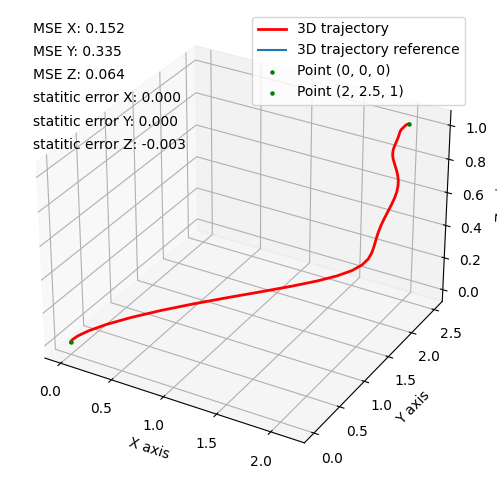

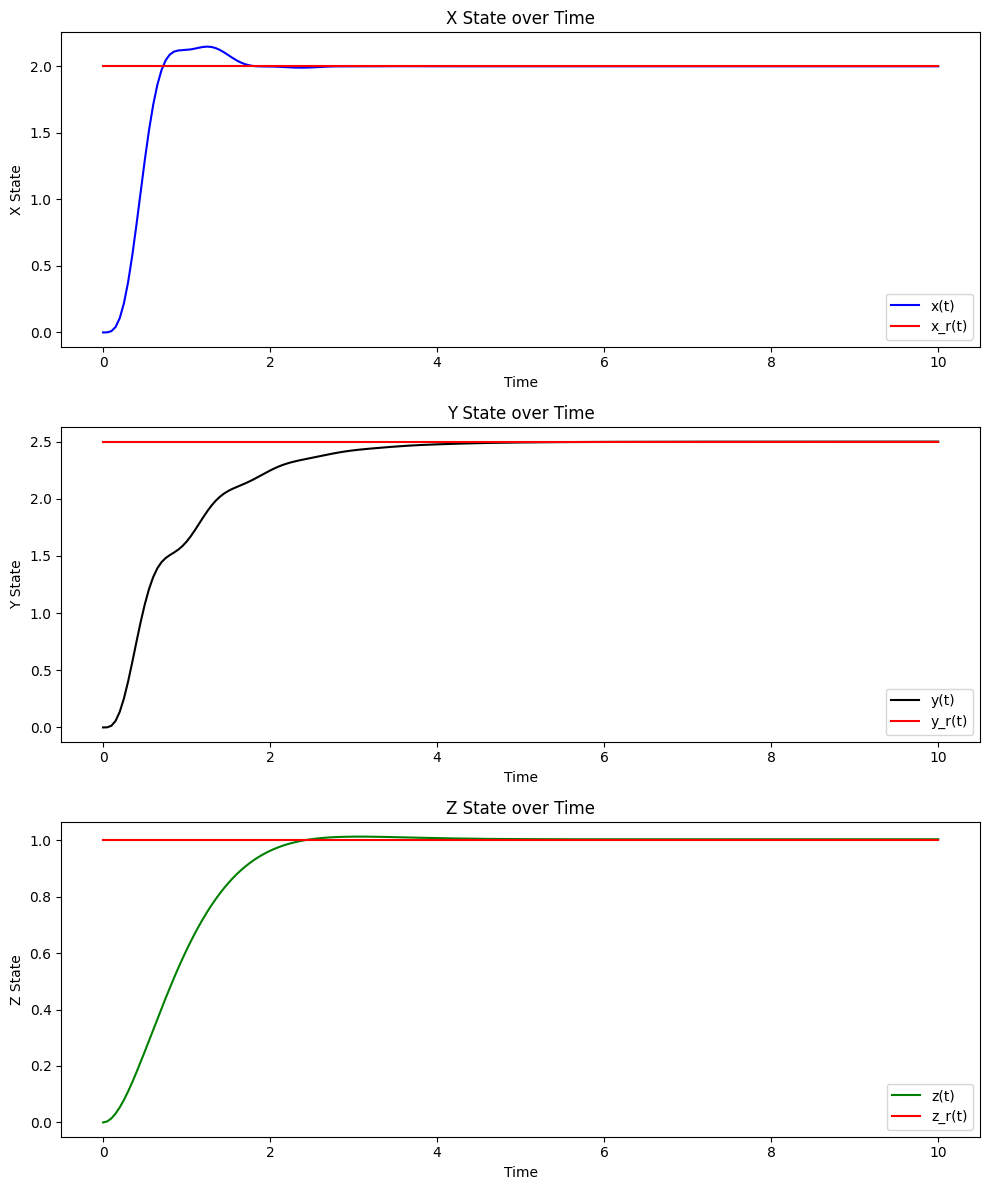

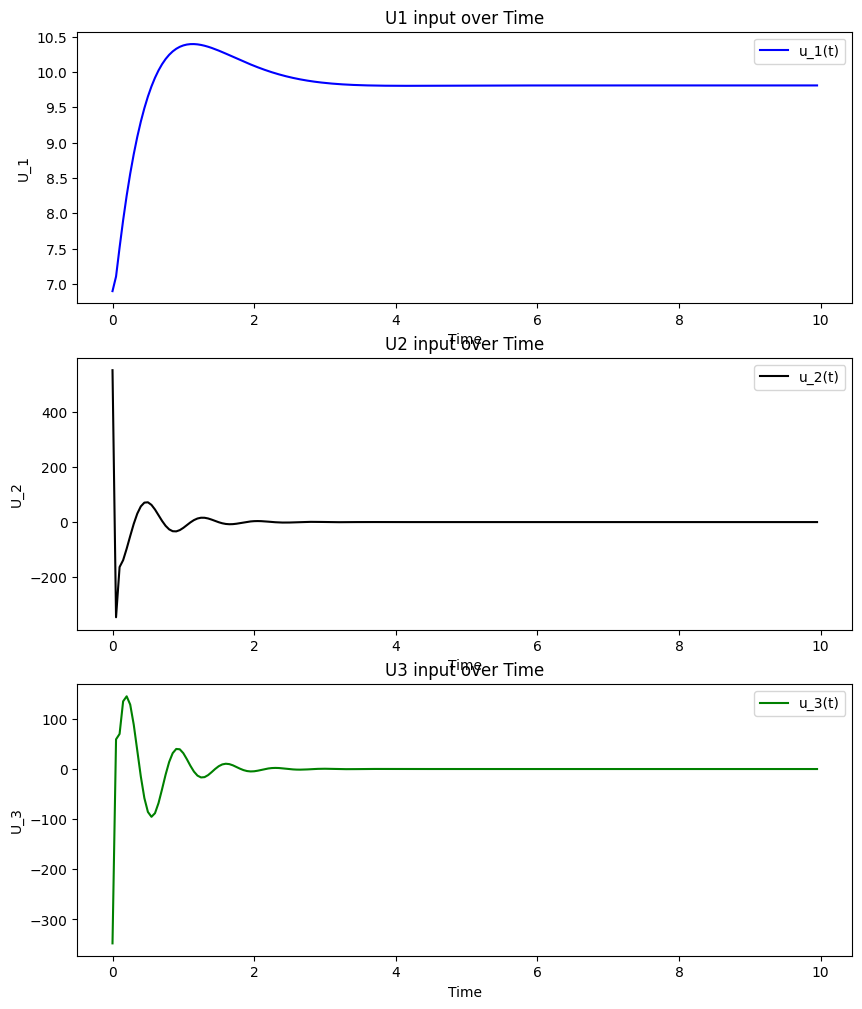

In [238]:
# Define the initial state of the system and control input
x0 = np.zeros([3,12])  # Replace with actual initial state
u0 = [0.0, 0.0,0.0, 0.0]  # Replace with actual control input
eps = 0.05
derivative_ini = [np.zeros([3,3]),np.zeros([3]), np.zeros([3]),np.zeros([3])]



gains = np.array([
    np.array([2.90, 2.7]),
    np.array([100,0.99]),
    np.array([9.50, 8.8]),
    np.array([160, 24]),
    np.array([12,5.])
], dtype=np.float64)


# Perform the simulation and plot the results
simulate_for_duration_point(x0,derivative_ini, u0, eps, gains_track= gains)

### Tracking trajectory

In [172]:
def simulate_for_duration(x_initial, derivative_initial ,u_control, epsilon, gains_track, total_simulation_time=10 ):

    # Initialize state history with the initial state
    state_history = [x_initial]
    # Initialize derivatives history
    derivatives_history = [derivative_initial]
        # Initialize reference trajectory history
    reference_history = []

    # Calculate the number of steps based on the total simulation time and epsilon
    num_steps = int(np.ceil(total_simulation_time / epsilon))

    u_history = []

    # Run the simulation for the required number of steps
    # Run the simulation for the required number of steps
    for step in range(num_steps):

        t = step * epsilon

        # Get the reference trajectory at the current time
        reference_state = reference(t,epsilon)

        # Store the reference state
        reference_history.append(reference_state)
        # Get the current state
        current_state = state_history[-1]
        input_state = [state_history[-1], derivatives_history[-1][0], derivatives_history[-1][1],derivatives_history[-1][2],derivatives_history[-1][3]]

        # print('current_state',current_state)

        u_control = tracking_input(current_state=input_state, reference_traj=reference_state, gains=gains_track, eps=epsilon)
        u_history.append(u_control)

        # Simulate one step
        state_info = simulate_step(current_state[0], u_control, epsilon)
        state = state_info[0]
        derivatives = state_info[1:]


        # Update the state and derivatives histories
        state_history.append(state)
        derivatives_history.append(derivatives)

    # Extract x, y, z states for plotting
    state_history =np.array(state_history)
    state_t = state_history[:,0,:]
    x_states = np.array([state[0] for state in state_t])
    y_states = np.array([state[1] for state in state_t])
    z_states = np.array([state[2] for state in state_t])
    time_steps = np.arange(0, total_simulation_time + epsilon, epsilon)


    xr = np.array([re_state[0] for re_state in reference_history])
    yr = np.array([re_state[1] for re_state in reference_history])
    zr = np.array([re_state[2] for re_state in reference_history])
    zr = np.append(zr, zr[-1])
    xr = xr[:,0]
    yr = yr[:,0]
    xr = np.append(xr, xr[-1])
    yr = np.append(yr, yr[-1])

    u_1 = np.array([u[0] for u in u_history])
    u_2 = np.array([u[1] for u in u_history])
    u_3 = np.array([u[2] for u in u_history])
    u_4 = np.array([u[3] for u in u_history])

    print(u_1.shape)

    mse_x = sum((xr-x_states)**2)/np.shape(xr)[0]
    mse_y = sum((yr-y_states)**2)/np.shape(xr)[0]
    mse_z = sum((zr-z_states)**2)/np.shape(xr)[0]

    # Plot the x, y, z states over time
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_states, y_states, z_states, color='red', linewidth=2, label='3D trajectory')

    ax.plot(xr, yr, zr, label='3D trajectory reference')
    ax.scatter([0], [0], [0], color='green', s=5, label='Point (0, 0, 0)')  # s is the size of the point
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    # Annotating the MSE values on the plot
    ax.text2D(0.05, 0.95, f"MSE X: {mse_x:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"MSE Y: {mse_y:.3f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.85, f"MSE Z: {mse_z:.3f}", transform=ax.transAxes)
    ax.legend()
    plt.show()

    #Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # X vs Time
    axs[0].plot(time_steps, x_states, label='x(t)', color='blue')
    axs[0].plot(time_steps, xr, label='x_r(t)', color='red')
    axs[0].set_title('X State over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('X State')
    axs[0].legend()

    # Y vs Time
    axs[1].plot(time_steps, y_states, label='y(t)', color='black')
    axs[1].plot(time_steps, yr, label='y_r(t)', color='red')
    axs[1].set_title('Y State over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Y State')
    axs[1].legend()

    # Z vs Time
    axs[2].plot(time_steps, z_states, label='z(t)', color='green')
    axs[2].plot(time_steps, zr, label='z_r(t)', color='red')
    axs[2].set_title('Z State over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Z State')
    axs[2].legend()
    plt.tight_layout()
    plt.show()


        #Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # X vs Time
    axs[0].plot(time_steps[0:u_1.shape[0]], u_1, label='u_1(t)', color='blue')
    axs[0].set_title('U1 input over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('U_1')
    axs[0].legend()

    # Y vs Time
    axs[1].plot(time_steps[0:u_1.shape[0]], u_2, label='u_2(t)', color='black')
    axs[1].set_title('U2 input over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('U_2')
    axs[1].legend()

    # Z vs Time
    axs[2].plot(time_steps[0:u_1.shape[0]], u_3, label='u_3(t)', color='green')

    axs[2].set_title('U3 input over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('U_3')
    axs[2].legend()



(200,)


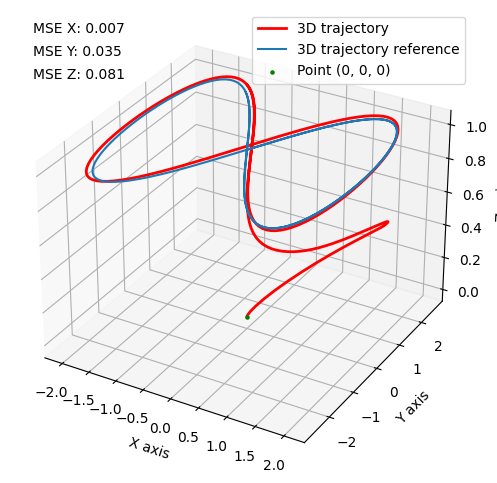

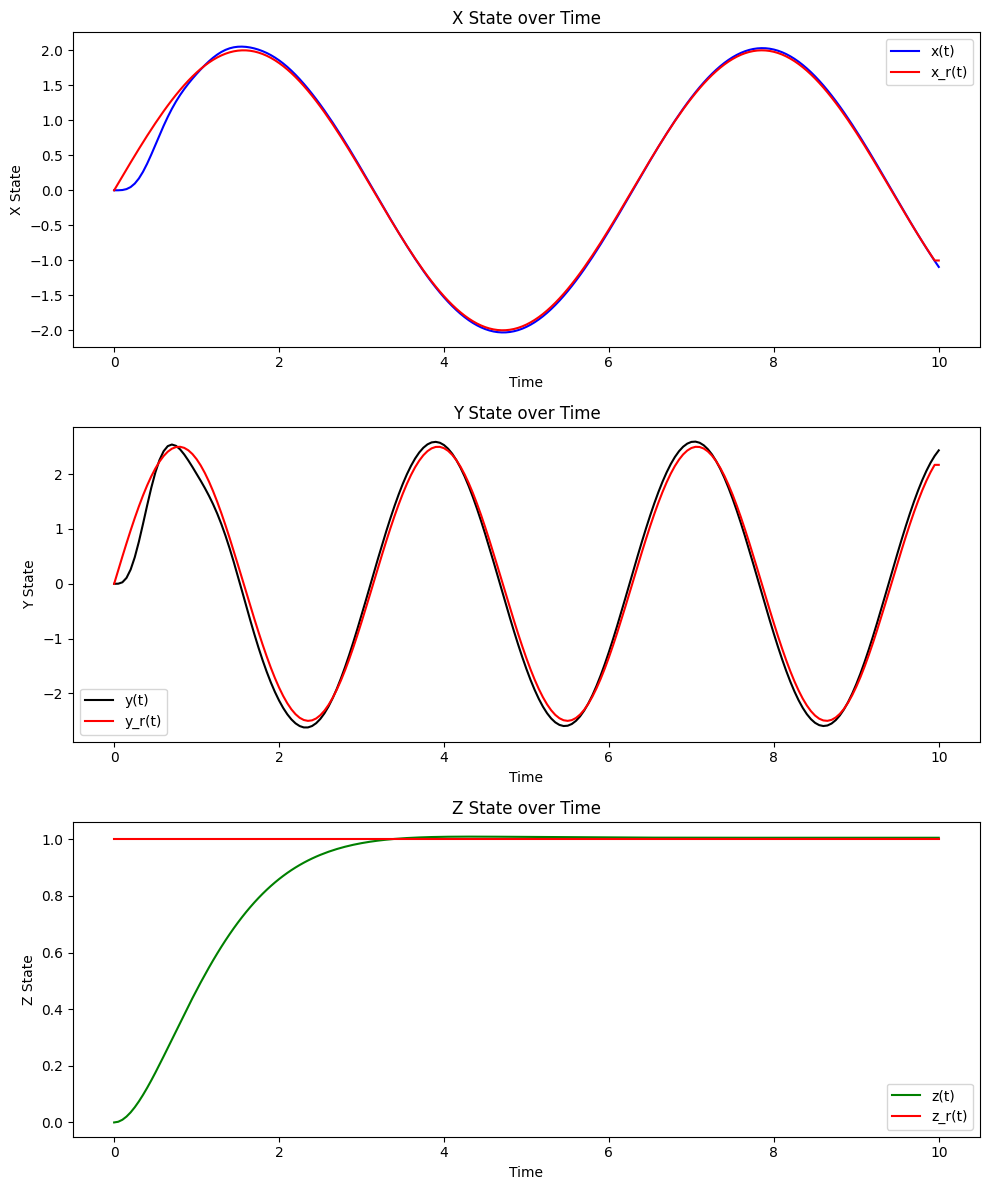

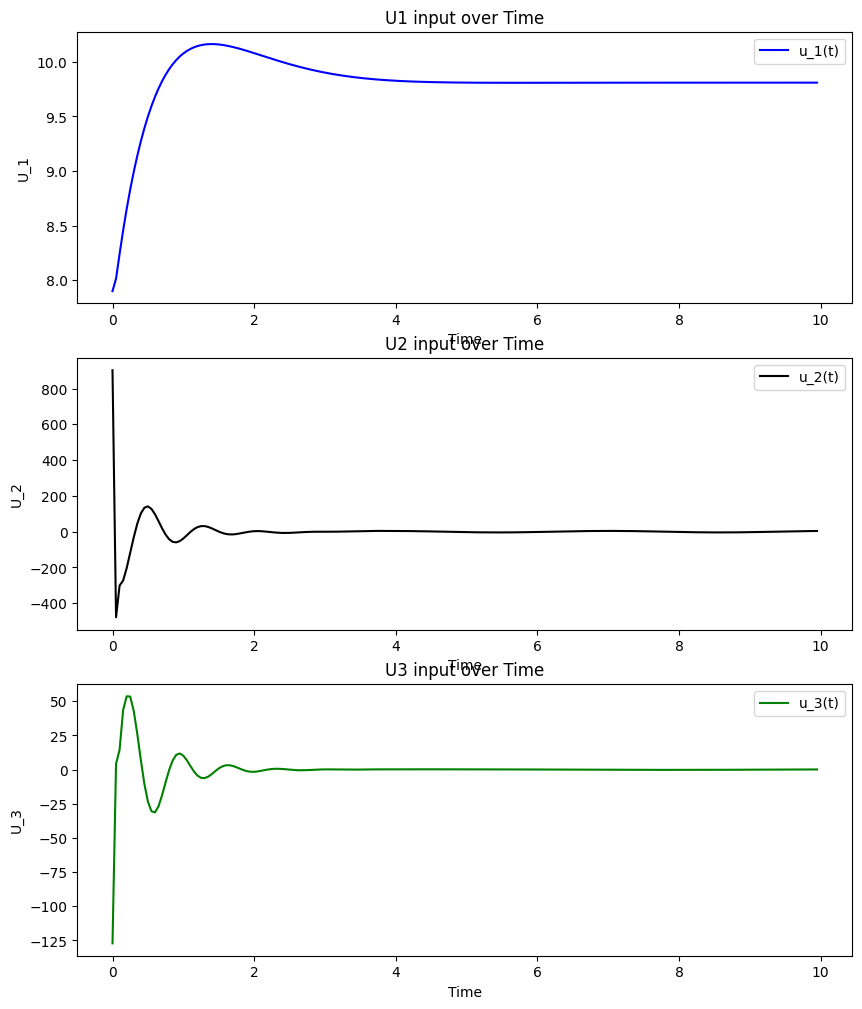

In [242]:
# Define the initial state of the system and control input
x0 = np.zeros([3,12])  # Replace with actual initial state
u0 = [0.0, 0.0,0.0, 0.0]  # Replace with actual control input
eps = 0.05
derivative_ini = [np.zeros([3,3]),np.zeros([3]), np.zeros([3]),np.zeros([3])]




gains = np.array([
    np.array([1.90, 2.3]),
    np.array([100,0.99]),
    np.array([9.50, 8.8]),
    np.array([160, 24]),
    np.array([12,5.])
], dtype=np.float64)

# Perform the simulation and plot the results
simulate_for_duration(x0,derivative_ini, u0, eps, gains_track= gains)

### Disturbance

In [174]:
def simulate_for_duration_disturbance(x_initial, derivative_initial ,u_control, epsilon, gains_track, disturbance_level, total_simulation_time=10):

    # Initialize state history with the initial state
    state_history = [x_initial]
    # Initialize derivatives history
    derivatives_history = [derivative_initial]
        # Initialize reference trajectory history
    reference_history = []

    # Calculate the number of steps based on the total simulation time and epsilon
    num_steps = int(np.ceil(total_simulation_time / epsilon))

    # Run the simulation for the required number of steps
    # Run the simulation for the required number of steps
    for step in range(num_steps):

        t = step * epsilon

        # Get the reference trajectory at the current time
        reference_state = reference(t,epsilon)

        # Store the reference state
        reference_history.append(reference_state)
        # Get the current state
        current_state = state_history[-1]
        input_state = [state_history[-1], derivatives_history[-1][0], derivatives_history[-1][1],derivatives_history[-1][2],derivatives_history[-1][3]]

        # print('current_state',current_state)

        u_control = tracking_input(current_state=input_state, reference_traj=reference_state, gains=gains_track, eps=epsilon)
        # Simulate one step

        if t >= 4.0 and t <= 7.0:
            noise = np.zeros(12)
            disturbance = np.random.randn(12) * disturbance_level
            #noise[6:8] =disturbance
            noise = noise +disturbance
            # Add the disturbance to the state
            input_state = current_state[0] + noise
        else:
            input_state = current_state[0]


        state_info = simulate_step(input_state, u_control, epsilon)
        state = state_info[0]
        derivatives = state_info[1:]

        # Update the state and derivatives histories
        state_history.append(state)
        derivatives_history.append(derivatives)

    # Extract x, y, z states for plotting
    state_history =np.array(state_history)
    state_t = state_history[:,0,:]
    x_states = np.array([state[0] for state in state_t])
    y_states = np.array([state[1] for state in state_t])
    z_states = np.array([state[2] for state in state_t])
    time_steps = np.arange(0, total_simulation_time + epsilon, epsilon)

    xr = np.array([re_state[0] for re_state in reference_history])
    yr = np.array([re_state[1] for re_state in reference_history])
    zr = np.array([re_state[2] for re_state in reference_history])
    xr = xr[:,0]
    yr = yr[:,0]


    # Plot the x, y, z states over time
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_states, y_states, z_states, color='red', linewidth=2, label='3D trajectory')

    ax.plot(xr, yr, zr, label='3D trajectory reference')
    ax.scatter([0], [0], [0], color='green', s=2, label='Point (0, 0, 0)')  # s is the size of the point

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.legend()
    plt.show()

    #Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # X vs Time
    axs[0].plot(time_steps, x_states, label='x(t)', color='blue')
    axs[0].plot(time_steps[0:time_steps.shape[-1]-1], xr, label='x_r(t)', color='red')
    axs[0].set_title('X State over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('X State')
    axs[0].legend()

    # Y vs Time
    axs[1].plot(time_steps, y_states, label='y(t)', color='black')
    axs[1].plot(time_steps[0:time_steps.shape[-1]-1], yr, label='y_r(t)', color='red')
    axs[1].set_title('Y State over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Y State')
    axs[1].legend()

    # Z vs Time
    axs[2].plot(time_steps, z_states, label='z(t)', color='green')
    axs[2].plot(time_steps[0:time_steps.shape[-1]-1], zr, label='z_r(t)', color='red')
    axs[2].set_title('Z State over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Z State')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

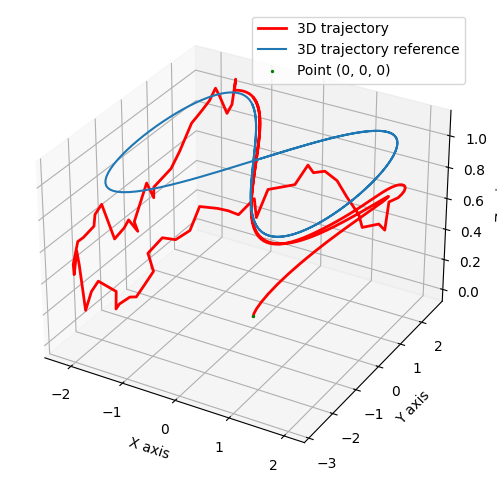

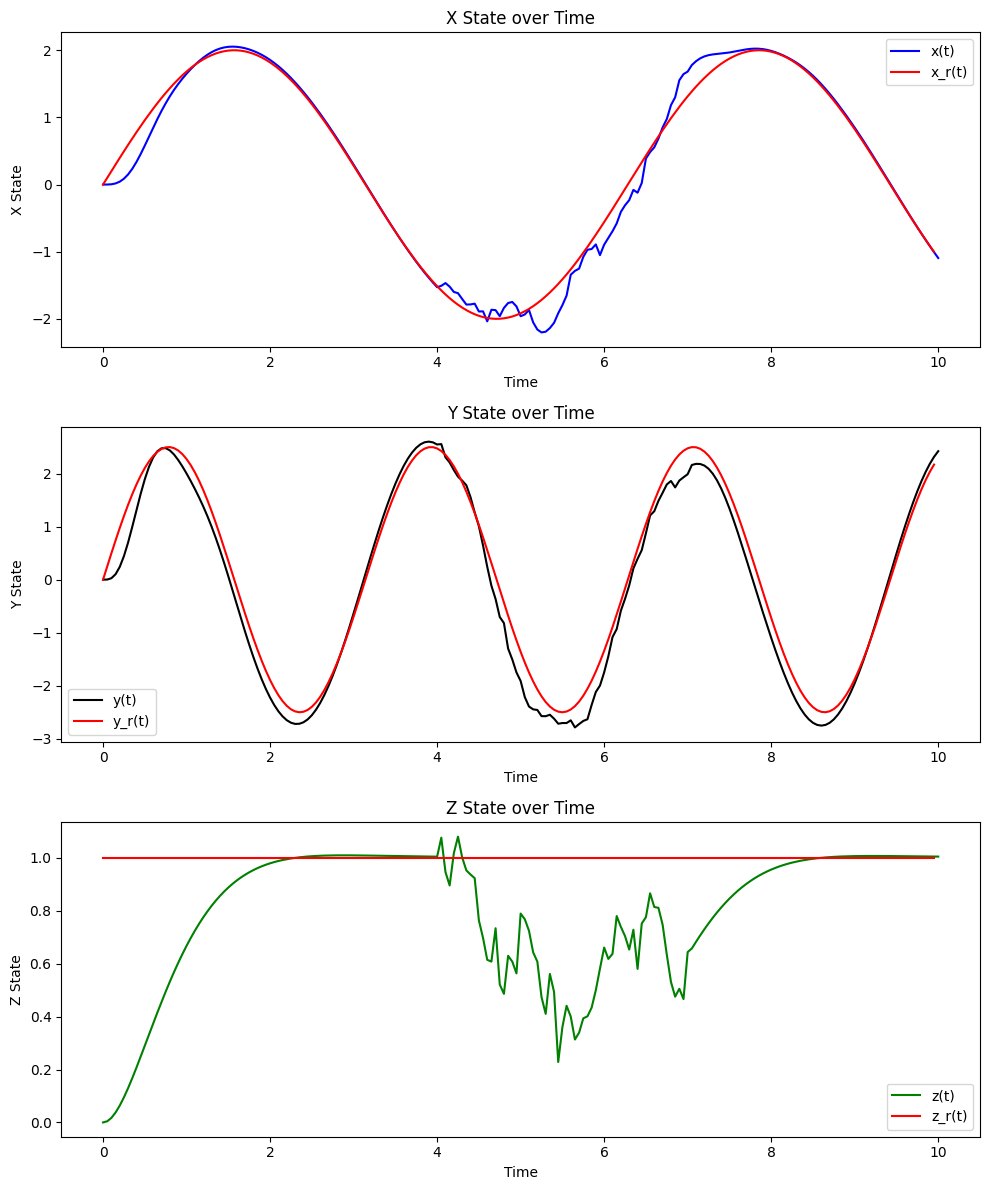

In [175]:
# Define the initial state of the system and control input
x0 = np.zeros([3,12])  # Replace with actual initial state
u0 = [0.0, 0.0,0.0, 0.0]  # Replace with actual control input
eps = 0.05
derivative_ini = [np.zeros([3,3]),np.zeros([3]), np.zeros([3]),np.zeros([3])]



gains = np.array([
    np.array([3.50, 3.0]),
    np.array([100,0.95]),
    np.array([6.50, 9.2]),
    np.array([150.5, 25.3]),
    np.array([12,5.])
], dtype=np.float64)

# Perform the simulation and plot the results
simulate_for_duration_disturbance(x0,derivative_ini, u0, eps, gains_track= gains,disturbance_level = 0.1)